Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

Load dataset and explore values

In [3]:
df=pd.read_csv('Position_Salaries.csv')

In [4]:
print(df.head())

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  9 non-null      object
 1   Level     9 non-null      int64 
 2   Salary    9 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 348.0+ bytes
None


In [7]:
print(df.describe())

          Level         Salary
count  9.000000       9.000000
mean   5.000000  129444.444444
std    2.738613   78439.644172
min    1.000000   45000.000000
25%    3.000000   60000.000000
50%    5.000000  110000.000000
75%    7.000000  200000.000000
max    9.000000  250000.000000


Handle and drop missing values

In [8]:
df=df.dropna()

Encode categorical values

In [14]:
le=LabelEncoder()
df['Position']=le.fit_transform(df['Position'])
df['Level']=le.fit_transform(df['Level'])
df['Salary']=le.fit_transform(df['Salary'])
df

,Position,Level,Salary
0,0,0,0
1,3,1,1
2,7,2,2
3,4,3,3
4,2,4,4
5,6,5,5
6,5,6,6
7,8,7,7
8,1,8,8


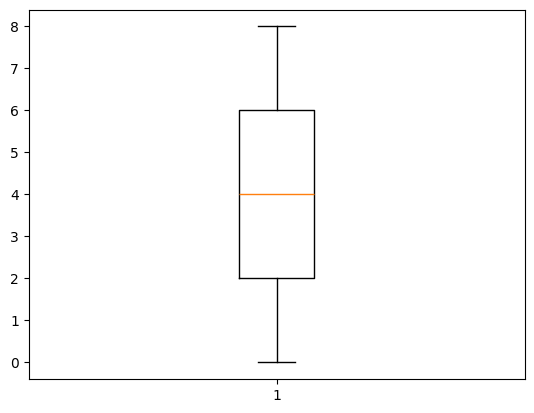

In [15]:
plt.boxplot(df['Level'])
plt.show()

Split into variables and use feature selection

In [16]:
X=df[['Position','Level']]
y=df['Salary']

In [20]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_test

array([[ 1.81413778,  1.22474487],
       [-0.23408229, -1.22474487]])

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train

,Position,Level
5,6,5
0,0,0
8,1,8
2,7,2
4,2,4
3,4,3
6,5,6


Train and employ linear regression model

In [21]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)
y_pred

array([7., 1.])

In [24]:
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Absolute Error:{mae}")
print(f"R² Score:{r2}")

Mean Absolute Error:0.0
R² Score:1.0


Visualize predictions

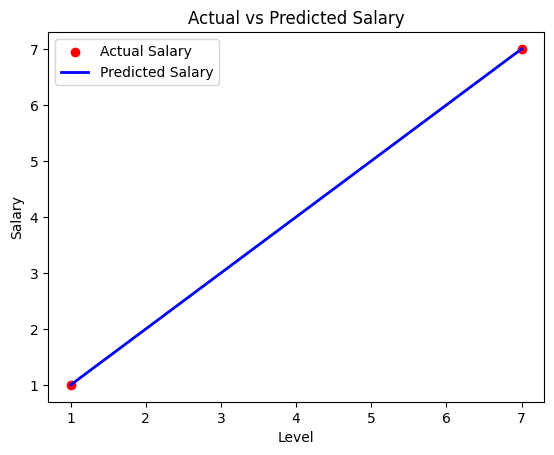

In [35]:
plt.scatter(X_test, y_test, color='red', label='Actual Salary')
plt.plot(X_test, y_pred, color='blue', linewidth=2, label='Predicted Salary')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Actual vs Predicted Salary')
plt.legend()
plt.show()